In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution with agent failure probability $p$

In [4]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 80
fail_probability = [0, 0.01, 0.02]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=36.63970721202496, L=-93116.31295130643, U=-2473.8851560874537
k=1, rel_gap=0.7374639533249551, L=-4298.286283367631, U=-2473.8851560874537
k=2, rel_gap=0.256048993054275, L=-4216.637704729296, U=-3357.064675061677
k=3, rel_gap=0.139854523360418, L=-4205.707759177008, U=-3689.6881777317626
k=4, rel_gap=0.10154492035906636, L=-4191.619803760036, U=-3805.2191302318474
k=5, rel_gap=0.08854772643730015, L=-4178.666793367489, U=-3838.753866166086
k=6, rel_gap=0.08285106166401236, L=-4168.706404745352, U=-3849.750489544998
k=7, rel_gap=0.07839861149316396, L=-4155.312267999856, U=-3853.224794351654
k=8, rel_gap=0.07399282590859074, L=-4147.242736772653, U=-3861.518100238811
k=9, rel_gap=0.07053853550577359, L=-4136.947488423323, U=-3864.361114725152
k=10, rel_gap=0.06534142434490199, L=-4122.864783328331, U=-3869.993871554893
k=11, rel_gap=0.058434217212932744, L=-4117.577701910225, U=-3890.2537682054763
k=12, rel_gap=0.05395051233396161, L=-4111.720833922948, U=-3901.2465820786

k=24, rel_gap=0.0278638640326115, L=-4086.3919860811206, U=-3975.615963430221
k=25, rel_gap=0.027501342248242223, L=-4084.950738688091, U=-3975.615963430221
k=26, rel_gap=0.027183600505810424, L=-4083.687519544631, U=-3975.615963430221
k=27, rel_gap=0.02644334205690126, L=-4080.7445362380836, U=-3975.615963430221
k=28, rel_gap=0.02619377898068949, L=-4079.7523692884133, U=-3975.615963430221
k=29, rel_gap=0.02429537243483667, L=-4078.8075665347296, U=-3982.0618898619637
k=30, rel_gap=0.024114742828006606, L=-4078.088288261191, U=-3982.0618898619637
k=31, rel_gap=0.023748121261890208, L=-4076.6283784947573, U=-3982.0618898619637
k=32, rel_gap=0.023243730770062514, L=-4074.6198643396415, U=-3982.0618898619637
k=33, rel_gap=0.02304864660223393, L=-4073.843027109616, U=-3982.0618898619637
k=34, rel_gap=0.019517523258292063, L=-4072.824164463742, U=-3994.8544988685817
k=35, rel_gap=0.018072789638941603, L=-4072.350826683539, U=-4000.058608901426
k=36, rel_gap=0.017281540740076543, L=-4071.90

k=48, rel_gap=0.01509352741662992, L=-4069.3721378993273, U=-4008.864235649012
k=49, rel_gap=0.01495491569942629, L=-4068.816462343588, U=-4008.864235649012
k=50, rel_gap=0.014007230294920039, L=-4068.0755977538925, U=-4011.8802669392294
k=51, rel_gap=0.01383470007446787, L=-4067.762202875925, U=-4012.253873907789
k=52, rel_gap=0.013540540088733215, L=-4067.570851981017, U=-4013.2295562887994
k=53, rel_gap=0.013245454543900853, L=-4067.376484204584, U=-4014.2064945511747
k=54, rel_gap=0.012819187819826154, L=-4066.7776541814214, U=-4015.3047089633874
k=55, rel_gap=0.012216561933996126, L=-4066.4593861095414, U=-4017.380804696519
k=56, rel_gap=0.012108771207662716, L=-4066.026349714645, U=-4017.380804696519
k=57, rel_gap=0.01185119718321598, L=-4064.9915767730445, U=-4017.380804696519
k=58, rel_gap=0.011339680047412743, L=-4064.6280529535416, U=-4019.0532747246575
k=59, rel_gap=0.011267636631805071, L=-4064.338506628121, U=-4019.0532747246575
k=60, rel_gap=0.011202255089495017, L=-4064.

# Centralized solution

In [3]:
h_cvx = ob.cvx_resource_allocation(params=params, R=R)[0]

# Plot

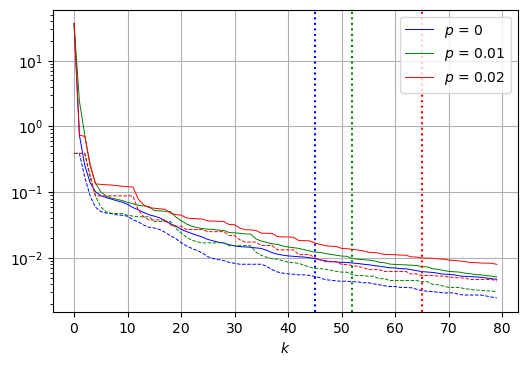

In [6]:
ob.plot_agent_failure(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)